In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=73572de0c0a8ee2de3d71265a2b4a522bda09898da3d1d0ef8881e271bc47f4d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pingouin as pg

In [ ]:
df = sns.load_dataset('diamonds')

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


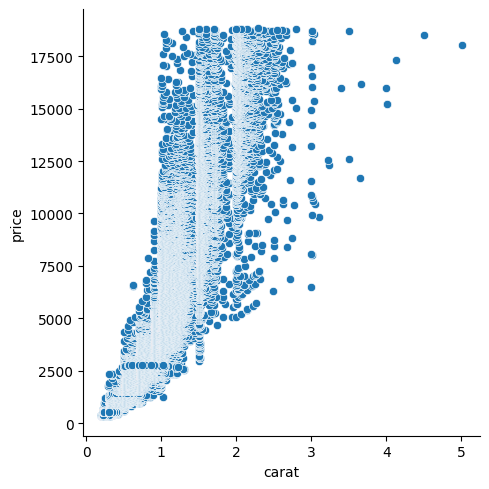

In [ ]:
sns.relplot(data=df, x='carat', y='price')

In [ ]:
pg.corr(x=df.carat, y=df.price)

,n,r,CI95%,p-val,BF10,power
pearson,53940,0.921591,"[0.92, 0.92]",0.0,inf,1.0


## Problem: 
Is color D pricier on average than color E?

In [ ]:
sel = ((df.color == 'E') | (df.color == 'D'))
df_colors = df.loc[sel, :].copy()
df_colors

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
...,...,...,...,...,...,...,...,...,...,...
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


<Axes: xlabel='color', ylabel='price'>

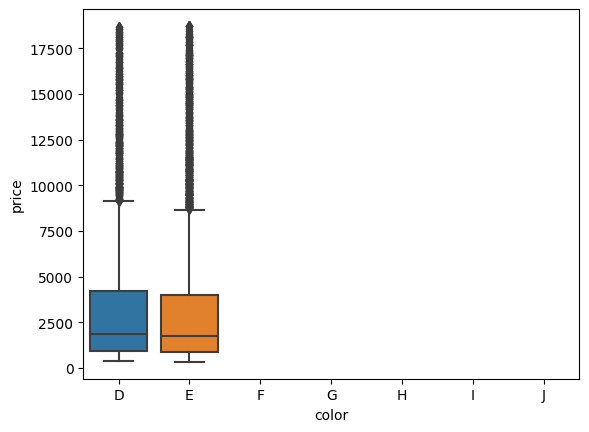

In [ ]:
sns.boxplot(x='color', y='price', data=df_colors)

In [ ]:
df_colors.groupby('color').price.mean()

color
D    3169.954096
E    3076.752475
F            NaN
G            NaN
H            NaN
I            NaN
J            NaN
Name: price, dtype: float64

In [ ]:
d_s = df.loc[df.color == 'D', 'price']
e_s = df.loc[df.color == 'E', 'price']
d_s

28        357
34        402
38        403
42        403
43        403
         ... 
53934    2757
53935    2757
53936    2757
53937    2757
53939    2757
Name: price, Length: 6775, dtype: int64

In [ ]:
e_s

0         326
1         326
2         327
8         337
14        345
         ... 
53926    2756
53928    2756
53930    2756
53932    2757
53933    2757
Name: price, Length: 9797, dtype: int64

In [ ]:
pg.ttest(x=d_s, y=e_s)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.759933,14530.933021,two-sided,0.07844,"[-10.6, 197.01]",0.027828,0.084,0.421253
